In [1]:
import os 
os.chdir("..")
from src.cpwc.multires.class_multiressolver import *
import matplotlib.pyplot as plt
import torch
from src.cpwc.tools.ptychography import Ptychography as Ptychography
from src.cpwc.tools.utils import *
torch.cuda.empty_cache()

# Set seeds 
torch.manual_seed(0)
np.random.seed(0)

/home/efe/Desktop/Multiresolution-Framework-for-Fourier-Ptychography/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import gc
for obj in gc.get_objects():
    try:
        if torch.is_tensor(obj) and obj.is_cuda:
            print(type(obj), obj.size())
    except Exception:
        pass

/home/efe/Desktop/Multiresolution-Framework-for-Fourier-Ptychography/.venv/lib/python3.8/site-packages/torch/distributed/distributed_c10d.py:181: UserWarning: torch.distributed.reduce_op is deprecated, please use torch.distributed.ReduceOp instead
  warnings.warn(


In [3]:
max_scale = 9
max_probe_size = 128
max_shift = 64
device = 'cuda'
I_in = 15*np.array([1, 15, 10, 5, 10, 30, 100])
I_out = 10*np.array([0, 0, 0, 30, 30,40,300])
cycle = [0, -1, -1, -1,  1, 1, 1]
lmbda = 0
LR = 1e-2
tol = [1e-10] * 9
tol_in = [1e-10] * 9

linOperator = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)
noise_level = 1
image = plt.imread('test_data/peppers.jpg')/ 255
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**max_scale, 2**max_scale)
image_tensor_ = torch.exp(1j * image_tensor)
m = torch.ones(2, 2).to(device= device)
d0 = image_tensor_[:,:,::16,::16]
d0 = torch.kron(d0, m)

multires = MultiRes(max_scale, device)
image_tensor_ = linOperator.apply(image_tensor_)
image_tensor_ = np.random.poisson(image_tensor_.cpu().detach() * noise_level) / noise_level
image_tensor_ = torch.tensor(image_tensor_).to(torch.complex64).to(device)


loss = Loss(linOperator,image_tensor_)
model1 = MultiResSolver(multires, loss, LR = LR,
                        I_in = I_in,
                        I_out = I_out,
                        tol = tol,
                        tol_in = tol_in,
                        cycle = cycle,
                        l1_type = "l1_row",
                        d0 = d0)

model1.solve_multigrid()
model1.print_time()

----------- s = 9 -----------
----------- s = 8 -----------
----------- s = 7 -----------
----------- s = 6 -----------
Iter 1, [loss, mse, reg, rel_loss, LR] : [17908.6760677, 17908.6760677, 0.1355156, 0.01] 
Iter 2, [loss, mse, reg, rel_loss, LR] : [15481.771282, 15481.771282, 0.0345471, 0.01] 
Iter 3, [loss, mse, reg, rel_loss, LR] : [14946.920883, 14946.920883, 0.0130723, 0.01] 
Iter 4, [loss, mse, reg, rel_loss, LR] : [14751.5302855, 14751.5302855, 0.0027944, 0.01] 
Iter 5, [loss, mse, reg, rel_loss, LR] : [14710.3088068, 14710.3088068, 0.0007505, 0.01] 
Iter 6, [loss, mse, reg, rel_loss, LR] : [14699.2681939, 14699.2681939, 0.0006728, 0.01] 
Iter 7, [loss, mse, reg, rel_loss, LR] : [14689.3787608, 14689.3787608, 0.0003339, 0.01] 
Iter 8, [loss, mse, reg, rel_loss, LR] : [14684.474339, 14684.474339, 9.19e-05, 0.01] 
Iter 9, [loss, mse, reg, rel_loss, LR] : [14683.1253854, 14683.1253854, 0.0001266, 0.01] 
Iter 10, [loss, mse, reg, rel_loss, LR] : [14681.2666458, 14681.2666458, 0.00

In [4]:
max_scale = 9
max_probe_size = 128
max_shift = 64
device = 'cuda'
I_in = 15*np.array([1, 15, 10, 5, 10, 30, 100])
I_out = 10*np.array([0, 0, 0, 30, 30,40,300])
cycle = [0, -1, -1, -1,  1, 1, 1]
lmbda = 0
LR = 1e-2
tol = [1e-10] * 9
tol_in = [1e-10] * 9

linOperator = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)
noise_level = 1
image = plt.imread('test_data/peppers.jpg')/ 255
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**max_scale, 2**max_scale)
image_tensor_ = torch.exp(1j * image_tensor)

multires = MultiRes(max_scale, device)
image_tensor_ = linOperator.apply(image_tensor_)
image_tensor_ = np.random.poisson(image_tensor_.cpu().detach() * noise_level) / noise_level
image_tensor_ = torch.tensor(image_tensor_).to(torch.complex64).to(device)


loss = Loss(linOperator,image_tensor_)
model2 = MultiResSolver(multires, loss, LR = LR,
                        I_in = I_in,
                        I_out = I_out,
                        tol = tol,
                        tol_in = tol_in,
                        cycle = cycle,
                        l1_type = "l1_row")

model2.solve_multigrid()
model2.print_time()

----------- s = 9 -----------
----------- s = 8 -----------
----------- s = 7 -----------
----------- s = 6 -----------
Iter 1, [loss, mse, reg, rel_loss, LR] : [129688.4697713, 129688.4697713, 0.4417064, 0.01] 
Iter 2, [loss, mse, reg, rel_loss, LR] : [72404.247644, 72404.247644, 0.271561, 0.01] 
Iter 3, [loss, mse, reg, rel_loss, LR] : [52742.0747506, 52742.0747506, 0.1448375, 0.01] 
Iter 4, [loss, mse, reg, rel_loss, LR] : [45103.0463619, 45103.0463619, 0.0595504, 0.01] 
Iter 5, [loss, mse, reg, rel_loss, LR] : [42417.1431664, 42417.1431664, 0.0646995, 0.01] 
Iter 6, [loss, mse, reg, rel_loss, LR] : [39672.7759657, 39672.7759657, 0.0860845, 0.01] 
Iter 7, [loss, mse, reg, rel_loss, LR] : [36257.5649961, 36257.5649961, 0.097448, 0.01] 
Iter 8, [loss, mse, reg, rel_loss, LR] : [32724.3367143, 32724.3367143, 0.0679458, 0.01] 
Iter 9, [loss, mse, reg, rel_loss, LR] : [30500.8541116, 30500.8541116, 0.0186151, 0.01] 
Iter 10, [loss, mse, reg, rel_loss, LR] : [29933.0780428, 29933.0780428,

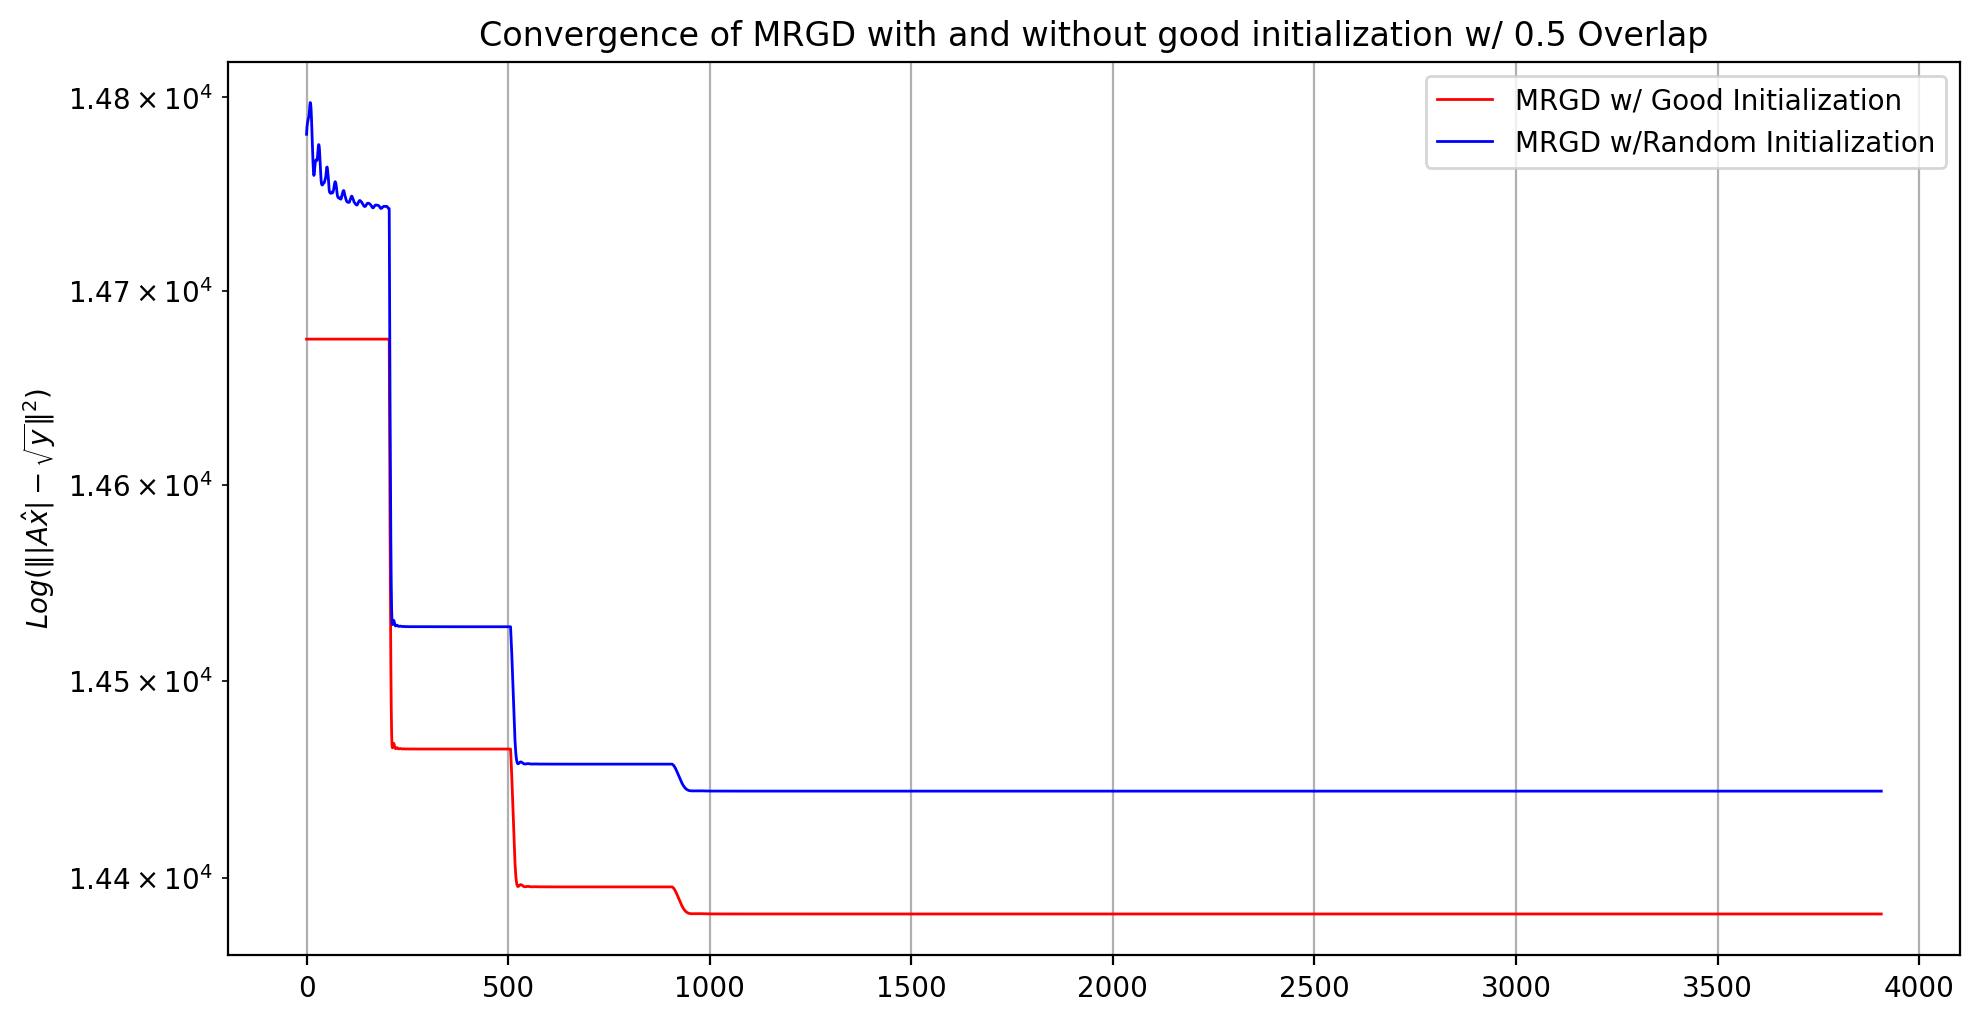

In [9]:
def extract_data(nested_list):
    result = []
    for item in nested_list:
        if isinstance(item, list):  # If the item is a list, recurse into it
            result.extend(extract_data(item))
        else:  # If the item is not a list, add it to the result
            result.append(item)
    return result


plt.figure(figsize=(10, 5),dpi = 200)
plt.semilogy(extract_data(model1.measures["loss"])[100:],label = "MRGD w/ Good Initialization",color = 'red', linestyle='-',linewidth = 1,markersize = 1)
plt.semilogy(extract_data(model2.measures["loss"])[100:],label = "MRGD w/Random Initialization",color = 'blue', linestyle='-',linewidth = 1,markersize = 1)
plt.ylabel(r"$Log(\||A\hat{x}|-\sqrt{y}\|^2)$")
plt.grid()
plt.tight_layout()
plt.title("Convergence of MRGD with and without good initialization w/ 0.5 Overlap")
plt.legend()


0.011645562302546401


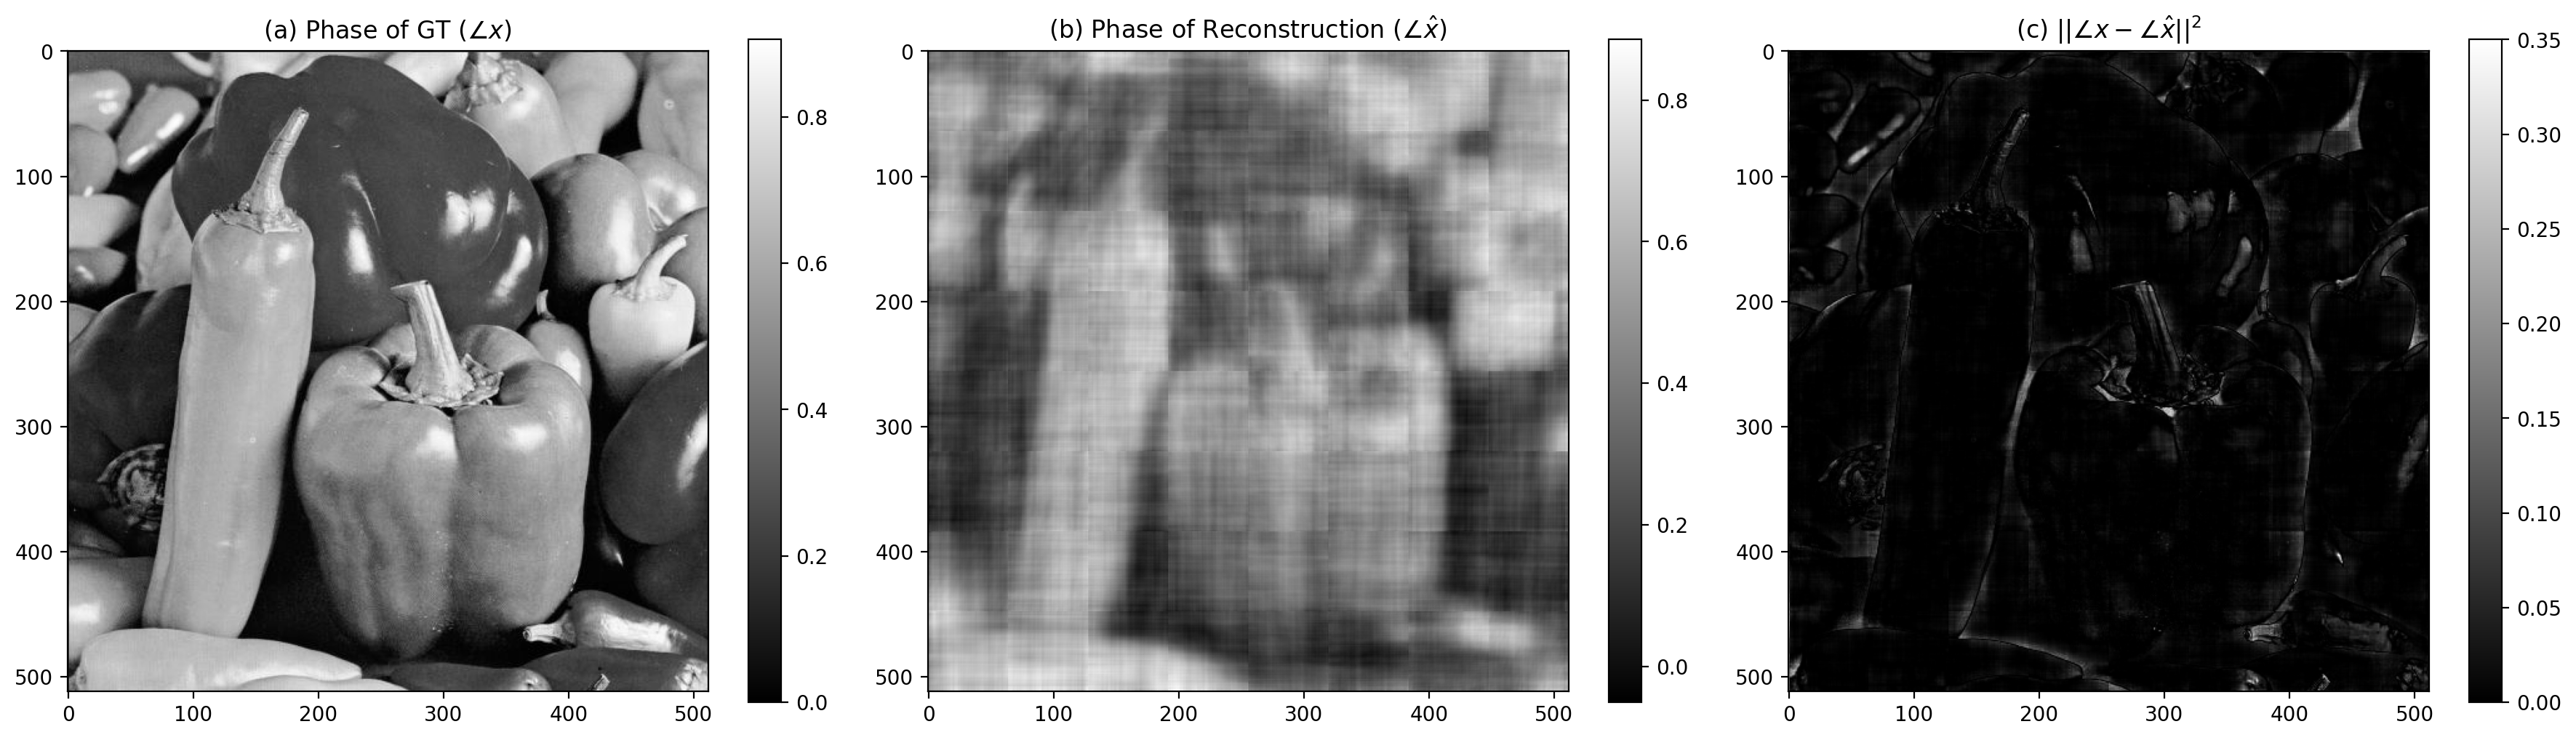

In [6]:
def unwrap_2d(phase):
    """
    Unwraps a 2D phase array using NumPy's 1D unwrap function.
    
    Parameters:
    phase (numpy array): The 2D phase array to be unwrapped.
    
    Returns:
    unwrapped_phase (numpy array): The 2D unwrapped phase array.
    """
    # Unwrap along the first axis (rows)
    unwrapped_phase = np.unwrap(phase, axis=0)
    
    # Unwrap along the second axis (columns)
    unwrapped_phase = np.unwrap(unwrapped_phase, axis=1)
    
    return unwrapped_phase

def plot_results(model,image):
    plt.figure(figsize=(18, 5),dpi = 200)    
    image = image[::,::]
    mean_img = np.mean(image)
    plt.subplot(1, 3, 1)
    plt.imshow(image,cmap='gray')
    plt.title(r"(a) Phase of GT $(\angle x)$")
    plt.colorbar()


    plt.subplot(1, 3, 2)
    phase = torch.angle(model.c_k[0,0,:,:].to('cpu'))
    phase = phase.numpy()
    phase = unwrap_2d(phase)
    phase += (mean_img-np.mean(phase))
    
    #phase = (phase - np.min(phase))/(np.max(phase) - np.min(phase))
    plt.imshow(phase,cmap = 'gray')
    plt.title(r"(b) Phase of Reconstruction $(\angle \hat{x})$")
    plt.colorbar()


    plt.subplot(1, 3, 3)
    error = np.abs(np.array(image)-np.array(phase))**2
    plt.imshow(error,cmap='gray')
    plt.title(r"(c) $||\angle x - \angle \hat{x}||^2$")
    plt.colorbar()
    plt.tight_layout()
    #plt.savefig("n_figs/new_result_img.png")
    #plt.savefig("n_figs/new_result_img.eps")
    mean_error = np.mean(error)
    print(mean_error)
    return None 

plot_results(model1,image)

0.011178175720642813


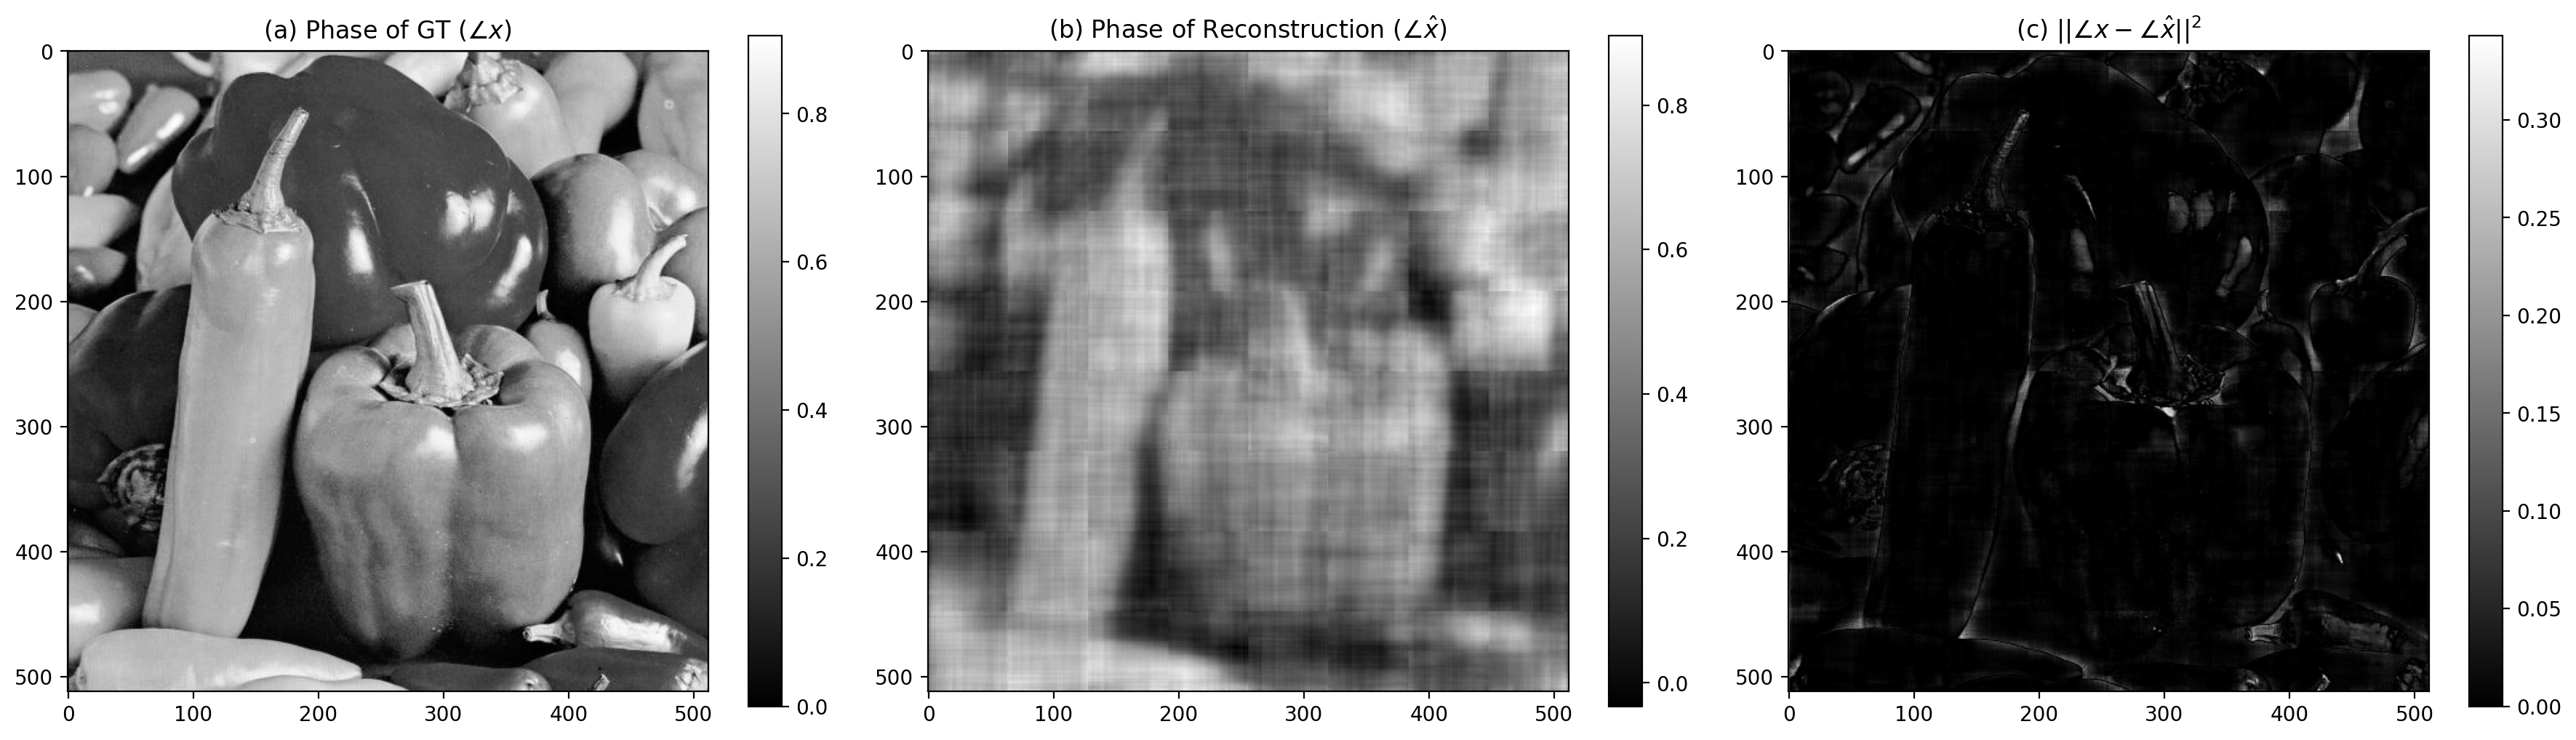

In [7]:
plot_results(model2,image)